In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [43]:
df = pd.read_csv('data/preprocessed_0813.csv')
df.head()

,realized_volatility,seconds_count,seconds_right_skew,seconds_skewness,seconds_kurtosis,wap_skewness,wap_kurtosis,bid_size1_skewness,bid_size1_max,bid_size1_mean,ask_size1_skewness,ask_size1_max,ask_size1_mean,bid_size2_skewness,ask_size2_skewness,row_id,size_max,size_sum,order_count_max,target
0,0.004106,302.0,152.841727,0.510418,-1.181185,-0.729681,3.300160,-0.803095,500.0,78.264901,-0.246879,228.0,74.579470,-0.669089,-0.426180,0-5,499.0,3179.0,12.0,0.004136
1,0.001507,200.0,147.965217,-0.362378,-1.001272,-0.053591,0.563174,0.288387,402.0,149.965000,1.345276,400.0,71.145000,1.269870,-0.172575,0-11,280.0,1289.0,6.0,0.001445
2,0.002468,188.0,159.897059,0.506732,-1.216982,-0.934322,0.324836,-0.164424,304.0,96.132979,1.279381,449.0,131.037234,0.538682,-1.122790,0-16,391.0,2161.0,8.0,0.002168
3,0.002708,120.0,120.509434,-0.032548,-1.013334,0.792628,0.111513,0.448781,370.0,114.458333,0.480632,400.0,120.800000,1.293843,0.790816,0-31,450.0,1962.0,15.0,0.002195
4,0.001932,176.0,131.988764,-0.402382,-1.151718,0.168761,-1.067718,0.579404,402.0,119.823864,0.121758,333.0,88.477273,-0.434153,1.519461,0-62,341.0,1791.0,17.0,0.001747


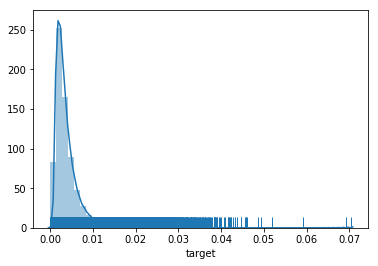

In [44]:
sns.distplot(df.target, rug = True, kde = True)

#### 1. feature PCA
#### 2. target log transform

In [16]:
# 1. PCA to features
# 1-1. Standard Scaling : after drop outliers

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_scaled_arr = stdsc.fit_transform(df.drop(['row_id','target'], axis=1))

In [17]:
X_scaled = pd.DataFrame(X_scaled_arr, columns = df.drop(['row_id','target'], axis=1).columns)

In [18]:
X_scaled.head()

,realized_volatility,seconds_count,seconds_right_skew,seconds_skewness,seconds_kurtosis,wap_skewness,wap_kurtosis,bid_size1_skewness,bid_size1_max,bid_size1_mean,ask_size1_skewness,ask_size1_max,ask_size1_mean,bid_size2_skewness,ask_size2_skewness,size_max,size_sum,order_count_max
0,-0.001701,-0.647334,0.460596,2.252025,0.028740,-1.148249,3.539690,-1.925638,-0.184833,-0.141687,-1.126982,-0.227038,-0.150889,-1.664002,-1.332039,-0.309631,-0.408220,-0.280835
1,-0.781394,-1.398253,-0.088261,-1.768817,1.808186,-0.074847,0.973483,-0.367606,-0.194079,-0.126933,1.143241,-0.209846,-0.151642,0.902521,-0.998849,-0.336367,-0.435121,-0.399110
2,-0.492999,-1.486596,1.254682,2.235042,-0.325309,-1.473149,0.750016,-1.013969,-0.203325,-0.138010,1.049283,-0.204948,-0.138520,-0.065324,-2.247255,-0.322816,-0.422710,-0.359685
3,-0.420982,-1.987209,-3.178443,-0.249338,1.688880,1.268663,0.550004,-0.138653,-0.197098,-0.134239,-0.089638,-0.209846,-0.140763,0.934253,0.266866,-0.315613,-0.425542,-0.221697
4,-0.653861,-1.574940,-1.886431,-1.953109,0.320185,0.278173,-0.555646,0.047805,-0.194079,-0.133135,-0.601349,-0.216543,-0.147844,-1.353026,1.224169,-0.328920,-0.427976,-0.182272


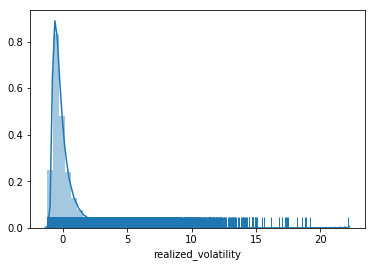

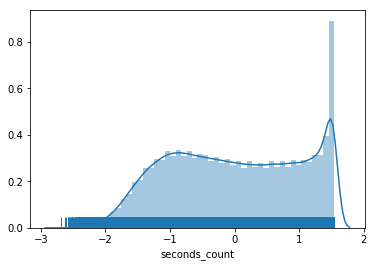

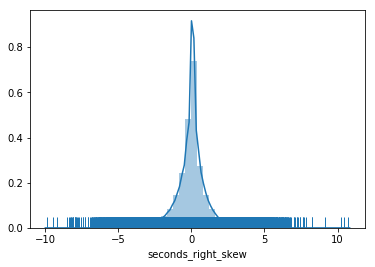

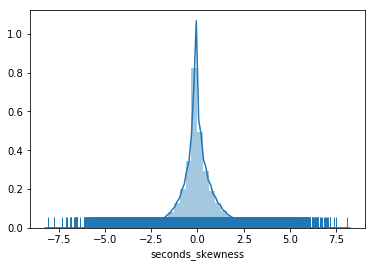

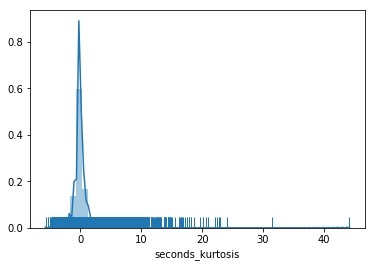

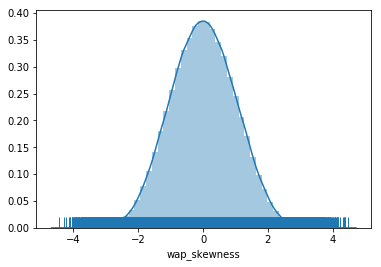

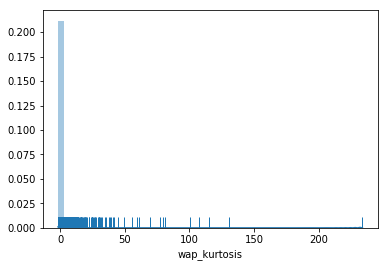

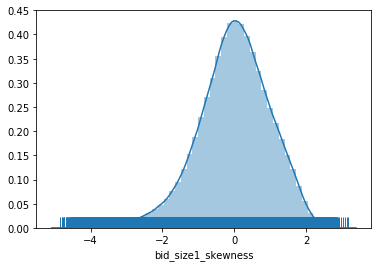

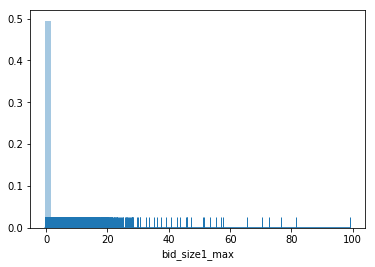

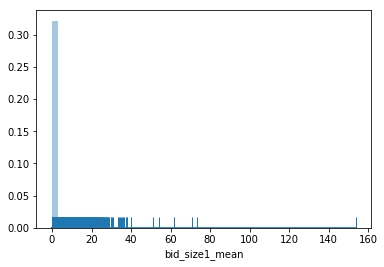

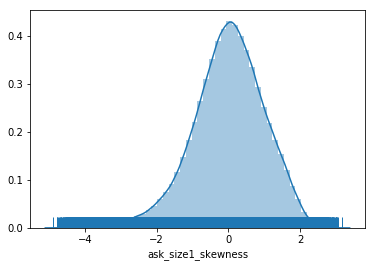

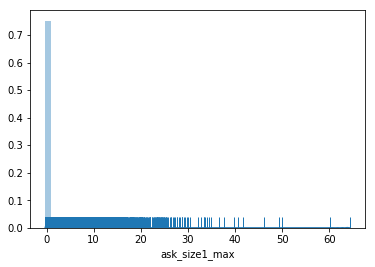

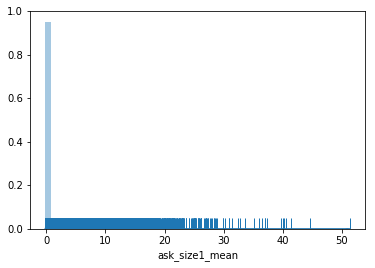

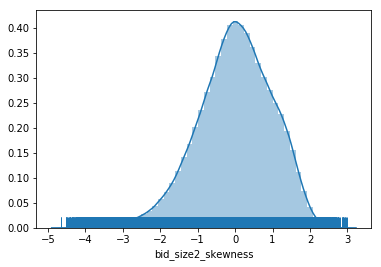

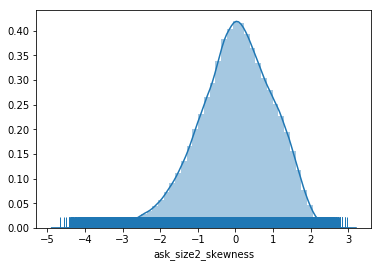

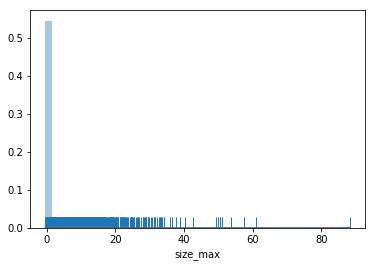

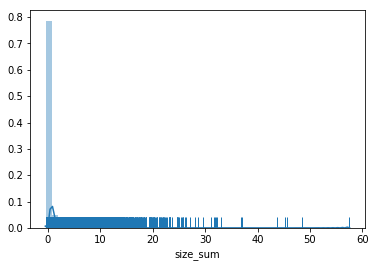

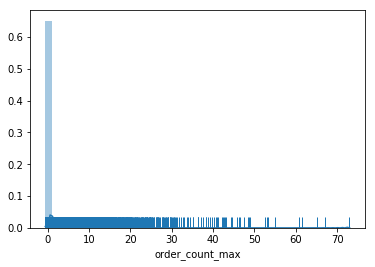

In [21]:
for col in X_scaled.columns :
    sns.distplot(X_scaled[col], rug = True)
    plt.show()

In [22]:
# realized volatility가 20이상
# seconds kurtosis 가 30이상
# wap kurtosis가 200이상
# bid_size1_max 가 100이상
# bid_size1_mean 이 140이상
# ask_size1_max 가 50이상
# ask_size1_mean 이 50이상
# size_max 가 80이상
# size_sum이 50이상
# 인 index들을 X_scaled에서 골라서, index를 저장하고
# df에서 이 index들만 제거한 다음 다시 standardscaling하기

In [23]:
drop_indexes = X_scaled[(X_scaled.realized_volatility>=20) |
         (X_scaled.seconds_kurtosis>=30) |
         (X_scaled.wap_kurtosis>=200) |
         (X_scaled.bid_size1_max>=100) |
         (X_scaled.bid_size1_mean>=140) |
         (X_scaled.ask_size1_max>=50) |
         (X_scaled.ask_size1_mean>=50) |
         (X_scaled.size_max>=80) |
         (X_scaled.size_sum>=50)].index

In [25]:
drop_ol_df = df.drop(drop_indexes, axis=0)

In [26]:
stdsc2 = StandardScaler()
X_scaled_arr2 = stdsc2.fit_transform(drop_ol_df.drop(['row_id','target'], axis=1))
X_scaled = pd.DataFrame(X_scaled_arr2, columns = drop_ol_df.drop(['row_id','target'], axis=1).columns)
X_scaled.head()

,realized_volatility,seconds_count,seconds_right_skew,seconds_skewness,seconds_kurtosis,wap_skewness,wap_kurtosis,bid_size1_skewness,bid_size1_max,bid_size1_mean,ask_size1_skewness,ask_size1_max,ask_size1_mean,bid_size2_skewness,ask_size2_skewness,size_max,size_sum,order_count_max
0,-0.001640,-0.647336,0.460596,2.252070,0.029016,-1.148260,3.790673,-1.925666,-0.187873,-0.145574,-1.127000,-0.229067,-0.151285,-1.664061,-1.332065,-0.313497,-0.409864,-0.280832
1,-0.781776,-1.398262,-0.088256,-1.768885,1.814573,-0.074846,1.042963,-0.367614,-0.197296,-0.130359,1.143245,-0.211686,-0.152041,0.902527,-0.998870,-0.340608,-0.436889,-0.399124
2,-0.493217,-1.486606,1.254675,2.235087,-0.326250,-1.473165,0.803690,-1.013986,-0.206718,-0.141782,1.049285,-0.206735,-0.138858,-0.065343,-2.247293,-0.326867,-0.424420,-0.359694
3,-0.421160,-1.987224,-3.178410,-0.249363,1.694857,1.268680,0.589532,-0.138658,-0.200372,-0.137894,-0.089646,-0.211686,-0.141112,0.934259,0.266863,-0.319563,-0.427266,-0.221685
4,-0.654171,-1.574951,-1.886409,-1.953181,0.321462,0.278178,-0.594320,0.047803,-0.197296,-0.136755,-0.601362,-0.218456,-0.148226,-1.353078,1.224181,-0.333057,-0.429711,-0.182254


In [31]:
for i in range(1, 7):
    cols= [str('PC_{}'.format(k)) for k in range(1, i+1)]
    print('num :', i, cols)

num : 1 ['PC_1']
num : 2 ['PC_1', 'PC_2']
num : 3 ['PC_1', 'PC_2', 'PC_3']
num : 4 ['PC_1', 'PC_2', 'PC_3', 'PC_4']
num : 5 ['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5']
num : 6 ['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6']


In [36]:
# 1-2. PCA
from sklearn.decomposition import PCA

pca_dict = dict()
for i in range(1, 11):
    pca = PCA(n_components = i)
    principalComponents = pca.fit_transform(X_scaled)
    cols = [str('PC_{}'.format(k)) for k in range(1, i+1)]
    principalDf = pd.DataFrame(data = principalComponents, columns = cols)
    pca_dict['N_Comp={}'.format(i)] = principalDf
    print('num of comps :', i, pca.explained_variance_ratio_, '\nsum =', np.sum(pca.explained_variance_ratio_))

num of comps : 1 [0.23859247] 
sum = 0.238592473701069
num of comps : 2 [0.23859247 0.10312342] 
sum = 0.34171589457256224
num of comps : 3 [0.23859247 0.10312368 0.08909312] 
sum = 0.4308092719074673
num of comps : 4 [0.23859247 0.10312361 0.08909314 0.08111757] 
sum = 0.5119267936738063
num of comps : 5 [0.23859247 0.10312368 0.08909319 0.08111758 0.05813086] 
sum = 0.5700577904950256
num of comps : 6 [0.23859247 0.10312368 0.08909319 0.08111758 0.05813086 0.05597593] 
sum = 0.6260337207515526
num of comps : 7 [0.23859247 0.10312368 0.08909319 0.08111758 0.05813086 0.05597593
 0.05464782] 
sum = 0.6806815441433149
num of comps : 8 [0.23859247 0.10312368 0.08909319 0.08111758 0.05813086 0.05597593
 0.05464782 0.05243612] 
sum = 0.7331176647919135
num of comps : 9 [0.23859247 0.10312368 0.08909319 0.08111758 0.05813086 0.05597593
 0.05464782 0.05243612 0.05119162] 
sum = 0.7843092848859797
num of comps : 10 [0.23859247 0.10312368 0.08909319 0.08111758 0.05813086 0.05597593
 0.05464782 

In [37]:
pca10 = PCA(n_components=10)
pca10_arr = pca10.fit_transform(X_scaled)
pca10_df = pd.DataFrame(pca10_arr, columns = [str('PC_{}'.format(k)) for k in range(1, 11)])
pca10_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,-0.155031,-1.031716,-2.079595,-1.677684,3.589024,2.021993,2.164106,1.011512,0.545634,-0.119892
1,-0.823693,-1.452688,1.129292,-0.361486,-0.861420,0.269196,1.322357,0.513650,-0.123192,0.013337
2,-0.637941,-0.794500,-1.887414,0.120757,2.247786,1.365552,-0.474068,0.744245,-0.425616,-0.980444
3,-1.000310,-2.211183,2.941894,-0.938994,0.251587,-1.099138,0.782509,0.406511,0.086661,0.938123
4,-0.800124,-1.339889,1.190648,-1.215036,-1.714780,0.007081,0.155274,-0.557530,0.964705,0.586715


In [40]:
pca_df = pd.concat([pca10_df, drop_ol_df[['row_id','target']]], axis=1)
pca_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,row_id,target
0,-0.155031,-1.031716,-2.079595,-1.677684,3.589024,2.021993,2.164106,1.011512,0.545634,-0.119892,0-5,0.004136
1,-0.823693,-1.452688,1.129292,-0.361486,-0.861420,0.269196,1.322357,0.513650,-0.123192,0.013337,0-11,0.001445
2,-0.637941,-0.794500,-1.887414,0.120757,2.247786,1.365552,-0.474068,0.744245,-0.425616,-0.980444,0-16,0.002168
3,-1.000310,-2.211183,2.941894,-0.938994,0.251587,-1.099138,0.782509,0.406511,0.086661,0.938123,0-31,0.002195
4,-0.800124,-1.339889,1.190648,-1.215036,-1.714780,0.007081,0.155274,-0.557530,0.964705,0.586715,0-62,0.001747


#### 1. Outliers Checking